In [1]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
set_plot_sizes(12,14,16)

In [2]:
dataset = pd.read_csv('./Kaggle data/Tabular Aug/train.csv', low_memory=False)
dataset.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [3]:
dataset_test = pd.read_csv('./Kaggle data/Tabular Aug/test.csv', low_memory=False)
dataset_test.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
1,250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
2,250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
3,250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
4,250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


In [4]:
dataset.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,124999.500000,0.511213,51.378476,0.107155,0.050010,3595.133426,8.205953,164.508753,0.375533,16.669745,...,4856.812768,22.579100,2.030554,0.079692,1.555097,2.417556,0.537484,1.576900,8.048805,6.813920
std,72168.927986,0.307884,42.396636,1.322200,0.792368,6072.401061,5.475723,183.335563,0.813597,99.758709,...,8501.609009,14.849390,0.900211,0.587780,9.253785,0.892563,0.226589,0.646306,5.647368,7.940179
min,0.000000,-0.069273,-17.000000,-7.895580,-1.475560,-7589.280000,-3.291050,-40.967200,-4.143080,-502.813000,...,-12695.700000,-4.059170,0.057800,-1.998800,-24.686300,-1.131980,0.005249,-0.646967,-0.842397,0.000000
25%,62499.750000,0.251287,18.000000,-0.611172,-0.719418,163.864750,4.110127,27.894900,-0.026245,-17.392025,...,73.203100,11.525450,1.471650,-0.408975,-4.004925,1.906718,0.359646,1.215810,3.732800,1.000000
50%,124999.500000,0.514962,41.000000,0.253815,0.004099,943.000500,7.472445,91.005250,0.619862,8.714945,...,1060.025000,19.993200,1.660830,0.215710,0.759942,2.340430,0.531348,1.451285,7.182205,4.000000
75%,187499.250000,0.777323,75.000000,0.759249,0.765456,4115.355000,11.030950,240.843750,0.933855,55.407625,...,5572.982500,32.271625,2.320085,0.503134,6.202502,2.910020,0.709807,1.901632,10.998550,10.000000
max,249999.000000,1.072070,273.000000,9.768590,1.680190,37847.500000,35.078000,947.143000,4.010380,465.956000,...,54334.600000,79.912400,5.403020,1.944190,42.890400,5.576040,1.105400,4.492620,34.019200,42.000000


In [5]:
dataset_test.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,324999.500000,0.513137,51.612380,0.108166,0.047793,3567.849290,8.189529,163.303236,0.379849,16.626872,...,0.582965,4858.089360,22.590537,2.028026,0.079295,1.565588,2.422223,0.537009,1.575402,8.045628
std,43301.414527,0.307512,42.662212,1.338636,0.790894,6045.626929,5.443633,181.799298,0.812515,99.813298,...,0.445033,8497.126809,14.838069,0.898257,0.590101,9.268188,0.894294,0.226024,0.645402,5.642812
min,250000.000000,-0.064172,-17.000000,-7.952920,-1.491030,-7801.580000,-3.097580,-39.020100,-4.062280,-496.326000,...,-0.466885,-12183.200000,-4.134800,0.120638,-2.013430,-24.337800,-1.056300,0.010615,-0.673333,-0.762355
25%,287499.750000,0.254897,18.000000,-0.615063,-0.718730,161.797000,4.129198,27.774750,-0.024041,-17.780300,...,0.282301,73.567275,11.585500,1.470310,-0.408236,-4.015442,1.910507,0.359924,1.216300,3.719902
50%,324999.500000,0.516855,41.000000,0.253162,0.003786,935.088500,7.467945,90.090350,0.622288,8.433805,...,0.483258,1054.480000,19.939150,1.660235,0.215228,0.811492,2.341185,0.530720,1.449735,7.191640
75%,362499.250000,0.778300,76.000000,0.759430,0.761793,4076.672500,11.016600,239.953000,0.936772,55.053075,...,0.770184,5613.215000,32.208850,2.308523,0.502962,6.218857,2.918890,0.708449,1.895473,11.018700
max,399999.000000,1.072210,270.000000,9.931070,1.670420,38434.400000,34.533000,943.297000,4.183330,466.535000,...,3.347080,54417.900000,80.209000,5.421360,1.920450,42.504100,5.583770,1.102790,4.472940,33.686300


In [49]:
df, y, nas = proc_df(dataset, 'loss')

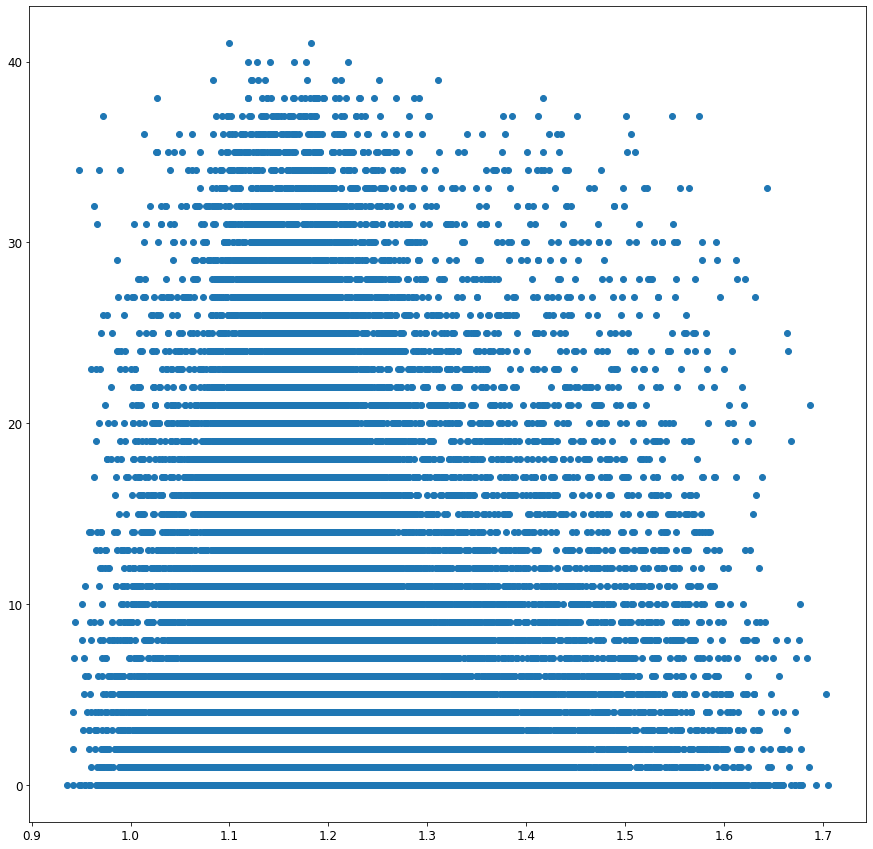

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.scatter((df.f9), y)

In [65]:
def split_vals(a,n): return a[:n], a[n:]

n_valid = 10
n_trn = len(df)-n_valid
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)
raw_train, raw_valid = split_vals(df, n_trn)

In [66]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize = True, n_jobs = -1)
%time regressor.fit(X_train, y_train)
print_score(regressor)

Wall time: 2.87 s
[7.894183682762267, 7.705127631953466, 0.011550145792188271, -0.025548312743009616]


In [68]:
result = regressor.predict(dataset_test)

In [45]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [39]:
m = RandomForestClassifier(n_estimators = 5, min_samples_leaf = 5, n_jobs=-1, oob_score = True)
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Wall time: 1.49 s
[8.303392880824882, 9.840619899173019, 0.6107777777777778, 0.184, 0.14326666666666665]


In [27]:
result = m.predict(dataset_test)

NameError: name 'm' is not defined

In [69]:
indices = np.arange(250000, 400000, 1)

In [70]:
df_pred = pd.DataFrame(result, index = indices, columns=['loss'])

In [71]:
df_pred

,loss
250000,7.361285
250001,5.394635
250002,7.667845
250003,6.677122
250004,7.397477
...,...
399995,8.207414
399996,7.245673
399997,6.589997
399998,6.375582


In [73]:
prediction = df_pred.to_csv('./Kaggle data/Tabular Aug/prediction.csv')

In [48]:
fi = rf_feat_importance(m, df); fi[:50]

,cols,imp
82,f81,0.011460
42,f41,0.010795
14,f13,0.010780
78,f77,0.010746
51,f50,0.010623
81,f80,0.010557
80,f79,0.010450
86,f85,0.010382
97,f96,0.010349
17,f16,0.010271


In [51]:
to_keep = fi[fi.imp>0.01].cols; len(to_keep)

25

In [119]:
df_keep = df[to_keep].copy()
df_test = dataset_test[to_keep].copy()
n_trn = len(df_keep) - 10000
X_train, X_valid = split_vals(df_keep, n_trn)
y_train, y_valid = split_vals(y, n_trn)
df_keep

,f81,f41,f13,f77,f50,f80,f79,f85,f96,f16,...,f33,f32,f65,f57,f37,f48,f99,f71,f39,f30
0,0.010485,3.22617,6.716200,1.301020,2.45660,2.29983,1.143470,0.594494,1.828470,4004232,...,0.915721,-0.275434,0.563482,1.83317,1.629560,-0.489950,10.489800,0.022504,-0.303139,1.09999
1,0.000652,2.90602,0.696384,-1.241790,1.43533,2.56631,0.959826,8.706220,0.819184,23567462,...,1.011280,-0.018724,0.723574,1.56770,-0.953850,-0.405681,1.143830,-0.060801,1.079530,1.23100
2,0.016848,2.42205,7.696420,-1.833390,2.59182,1.17201,1.170870,4.170990,2.216760,235760,...,0.809485,0.685721,0.049053,3.91896,0.634136,1.196010,12.305500,-0.026215,0.926980,1.10513
3,0.023735,1.56512,7.343230,0.792398,1.10013,2.90676,1.077330,5.347530,2.627310,1146032,...,0.206448,0.500353,0.535797,1.94539,0.625762,-0.372300,10.028800,0.018674,1.333210,1.11911
4,-0.001272,2.48867,17.394300,5.014080,1.44481,1.73348,1.120250,5.233990,2.195740,19272478,...,1.727440,-1.056850,0.546460,1.68786,0.150619,-0.646135,7.071970,0.001230,1.553550,1.60582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-0.037311,2.47255,5.136830,-2.037150,1.37759,1.36962,1.340980,4.474110,2.853420,14679489,...,1.087500,0.776357,0.488588,1.59423,-0.023043,0.307219,1.437650,0.035653,0.431171,1.11674
249996,-0.003201,3.03691,6.227890,1.211300,1.43284,1.54874,1.139400,-1.261490,1.994540,16386470,...,1.540340,-0.849631,0.602712,1.70802,0.854874,-0.523712,1.226720,-0.015662,-0.977680,1.41228
249997,0.002265,2.62165,1.685930,3.229210,1.03800,2.47066,1.194010,5.451490,1.012690,1617879,...,0.650738,-0.689484,0.613350,4.14936,2.080300,-0.765430,0.455332,-0.042235,0.844621,1.16511
249998,0.000453,2.62678,10.562000,-3.950520,4.04704,1.98376,1.178420,3.731210,3.938260,5518147,...,1.257960,-0.770248,0.896973,2.29737,1.917010,-0.171262,7.415890,-0.128344,0.969490,1.13893


In [109]:
print(X_train.shape) 
print(y_train.shape) 
print(X_valid.shape)
print(y_valid.shape)

(240000, 25)
(240000,)
(10000, 25)
(10000,)


In [120]:
m = RandomForestClassifier(n_estimators = 50, min_samples_leaf = 5, n_jobs=-1, oob_score = True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 50.7 s
[8.686554504903924, 10.47323732185994, 0.7402583333333334, 0.2452, 0.23210833333333333]


In [121]:
result = m.predict(df_test)

In [122]:
result.shape

(150000,)

In [123]:
df_pred = pd.DataFrame(result, index = indices, columns=['loss'])

In [125]:
prediction = df_pred.to_csv('./Kaggle data/Tabular Aug/prediction.csv')